<center><h1>Data Preparation and Exploratory Data Analysis (EDA)</h1></center> 

First, it is described the general aspects of the dataset. Then, the missing data is imputed. It is commented distribution plots before and after imputation. Finally, the scaling of the data and the visualization of the correlations between variables were carried out.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
os.getcwd()

'C:\\Users\\marco\\OneDrive\\Escritorio\\ESTUDIOS\\master ciencia de datos\\Practicas IFCA'

Loading the dataset

In [3]:
dfHeart = pd.read_csv(".\datasets\heart.csv")

In [4]:
dfHeart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
dfHeart['ChestPainType'].unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

-  Age: Discrete numerical variable
-  Sex: Categorical variable (M, F)
-  ChestPainType: Chest pain type, categorical variable (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)
-  RestingBP: Resting blood pressure, discrete numerical variable (mm Hg)
-  Cholesterol: serum cholesterol, discrete numerical variable (mm/dL)
-  FastingBS: Fasting blood sugar, categorical variable (1: if FastingBS > 120 mg/dL, 0: otherwise)
-  RestingECG: Resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: Showing probable or definite left ventricular hypertrophy by Estes' criteria)
-  MaxHR: Maximum heart rate achieved, discrete numerical variable
-  ExerciseAngina: exercise-induced angina, categorical variable (Y: Yes, N: No)
-  Oldpeak: Feature in the heart disease dataset that represents the ST depression induced by exercise relative to rest, continuous numerical variable (mm)
-  ST_Slope: The slope of the peak exercise ST segment, categorical variable (Up: upsloping, Flat: flat, Down: downsloping)
-  HeartDisease: Target variable, categorical variable (1: heart disease, 0: Normal)

Obtaining information about data count, null values, data types, etc.

In [6]:
dfHeart.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
dfHeart.duplicated().sum()

0

In [3]:
dfHeart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<!-- This datasets contains at least 11 features that can be used to predict a possible heart disease. The five datasets used:
- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations "https://archive.ics.uci.edu/ml/datasets/statlog+(heart)" -->

Not heart disease (y = 0)

In [6]:
len(dfHeart.loc[dfHeart["HeartDisease"] == 0,["HeartDisease"]])

410

Heart disease (y = 1)

In [7]:
dfHeart["HeartDisease"].sum()

508

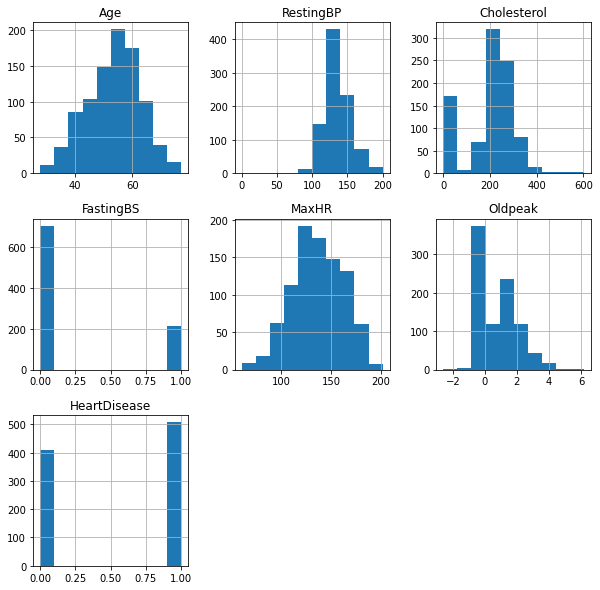

In [9]:
histRaw = dfHeart.hist(figsize = (10,10))

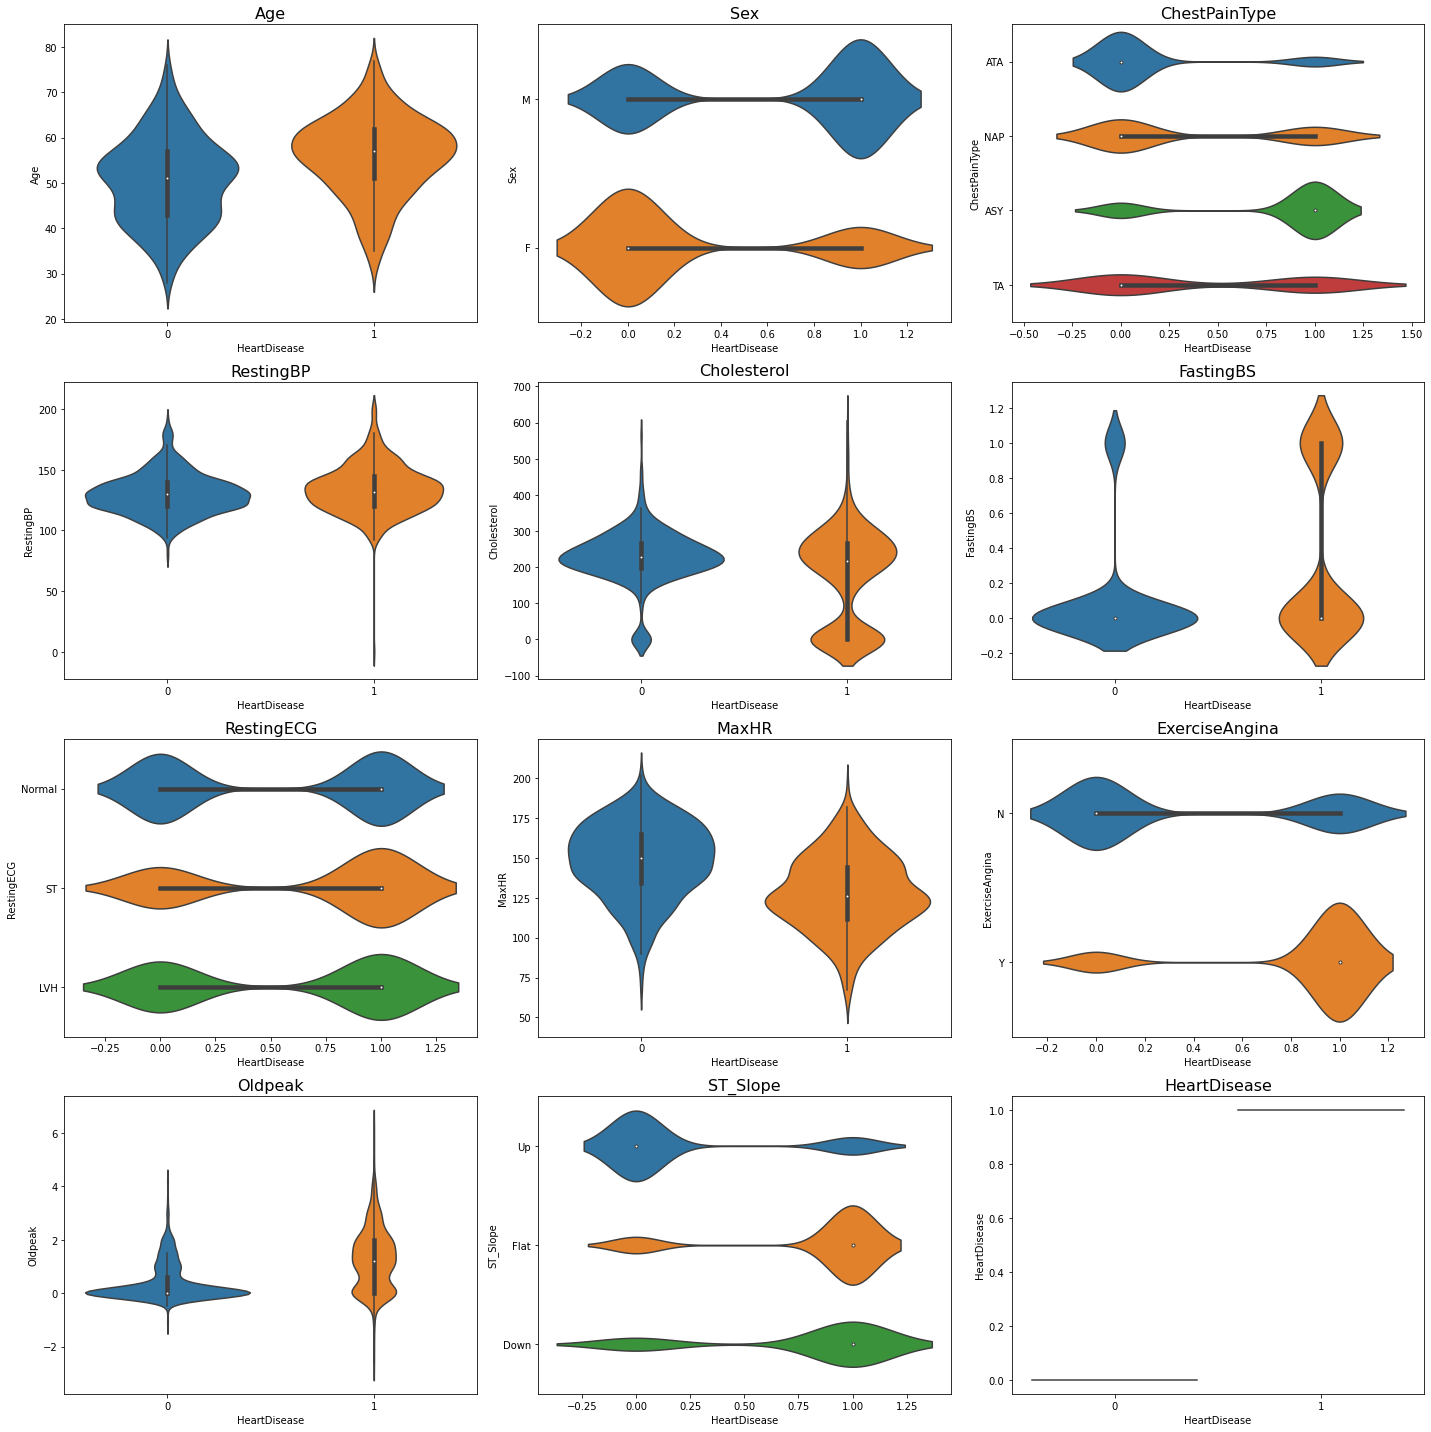

In [20]:
# Define the number of rows and columns for the subplots
nrows, ncols = 4, 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(dfHeart.columns):
    sns.violinplot(x="HeartDisease", y =col, data=dfHeart, ax=axes[i])
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, dfHeart.columns):
    ax.set_title(col, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [18]:
# calculate the IQR for each numerical column
Q1 = dfHeart.quantile(0.25)
Q3 = dfHeart.quantile(0.75)
IQR = Q3 - Q1

# align the indices
dfHeart, Q1 = dfHeart.align(Q1, join='left', axis=1)
dfHeart, Q3 = dfHeart.align(Q3, join='left', axis=1)
dfHeart, IQR = dfHeart.align(IQR, join='left', axis=1)

# identify outliers in each column
outliers = ((dfHeart < (Q1 - 1.5 * IQR)) | (dfHeart > (Q3 + 1.5 * IQR))).sum()
print(outliers)

Age                 0
Sex                 0
ChestPainType       0
RestingBP          28
Cholesterol       183
FastingBS         214
RestingECG          0
MaxHR               2
ExerciseAngina      0
Oldpeak            16
ST_Slope            0
HeartDisease        0
dtype: int64


In outliers, we can ignore FastingBS because it is a categorical variable. Comparing outliers with histograms and violinplots we can deduce that Cholesterol appears to have missing values in form of zero values. Oldpeak and RestingBP also could have null values in form of zero values.

In [21]:
len(dfHeart.loc[dfHeart["Cholesterol"] == 0,["Cholesterol"]])

172

In [25]:
len(dfHeart.loc[dfHeart["RestingBP"] == 0,["RestingBP"]])

1

In [49]:
dfHeart[dfHeart['RestingBP'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [35]:
Q1 = dfHeart["RestingBP"].quantile(0.25)
Q3 = dfHeart["RestingBP"].quantile(0.75)
IQR = Q3 - Q1
print(dfHeart.loc[((dfHeart["RestingBP"] < (Q1 - 1.5 * IQR)) | (dfHeart["RestingBP"] > (Q3 + 1.5 * IQR))), ["RestingBP"]])

     RestingBP
109        190
123        180
189        180
190        180
241        200
274        180
275        180
278        180
314         80
365        200
372        185
399        200
411        180
423        180
449          0
475        178
550        172
585        180
592        190
673        174
702        178
725        180
732        200
759        192
774        178
780        180
855        180
880        172


In [43]:
df_temp = dfHeart.loc[((dfHeart["RestingBP"] < (Q1 - 1.5 * IQR)) | (dfHeart["RestingBP"] > (Q3 + 1.5 * IQR))), ["RestingBP"]]
df_temp.loc[df_temp['RestingBP'] != 0,['RestingBP']].min()

RestingBP    80
dtype: int64

In [42]:
df_temp.loc[df_temp['RestingBP'] > 80,['RestingBP']].min()

RestingBP    172
dtype: int64

All the outliers of RestingBP could be real except one zero value (heart not functioning). Values higher than 150 mm Hg are considered hypertensive crisis and requires urgent medical attention.

Plotting a modified histogram for the variable "Oldpeak" with a bin for each value:

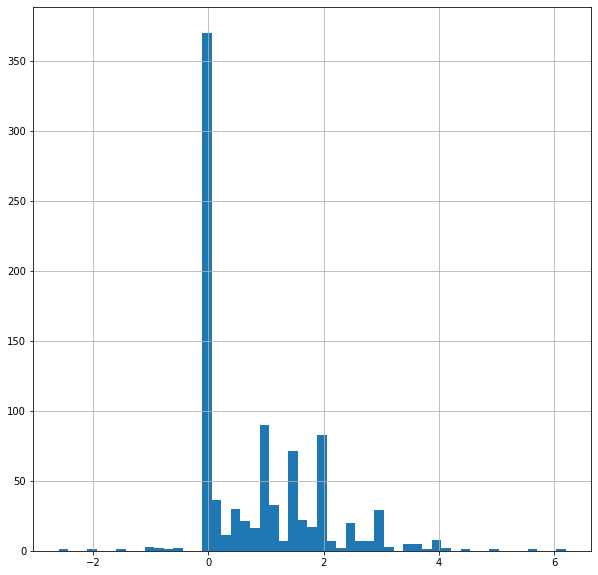

In [47]:
num_bins = len(dfHeart['Oldpeak'].unique())
dfHeart['Oldpeak'].hist(bins=num_bins,figsize = (10,10))
plt.show()

In [44]:
len(dfHeart.loc[dfHeart["Oldpeak"] == 0,["Oldpeak"]])

368

Without domain knowledge, it is difficult to determine if the variable "Oldpeak" have null values in form of zero values. 0 mm of ST segment could be correct and common, specially in patients without heart disease as we can see in violinplot.

In [51]:
dfHeart[['Cholesterol','RestingBP']] = dfHeart[['Cholesterol','RestingBP']].replace(0,np.NaN)

In [52]:
dfHeart[['Cholesterol','RestingBP']].describe().loc[['mean','50%']]

,Cholesterol,RestingBP
mean,244.635389,132.540894
50%,237.000000,130.000000


When the mean is very different from the median, it is said to have a skewed distribution.

In [53]:
medians_0 = dfHeart.loc[dfHeart["HeartDisease"] == 0, ['Cholesterol','RestingBP']].median()
medians_1 = dfHeart.loc[dfHeart["HeartDisease"] == 1, ['Cholesterol','RestingBP']].median()

In [54]:
dfHeart.loc[(dfHeart["HeartDisease"] == 0) & (dfHeart['Cholesterol'].isna()), 'Cholesterol'] = medians_0['Cholesterol']
dfHeart.loc[(dfHeart["HeartDisease"] == 1) & (dfHeart['Cholesterol'].isna()), 'Cholesterol'] = medians_1['Cholesterol']
dfHeart.loc[(dfHeart["HeartDisease"] == 1) & (dfHeart['RestingBP'].isna()), 'RestingBP'] = medians_1['RestingBP']

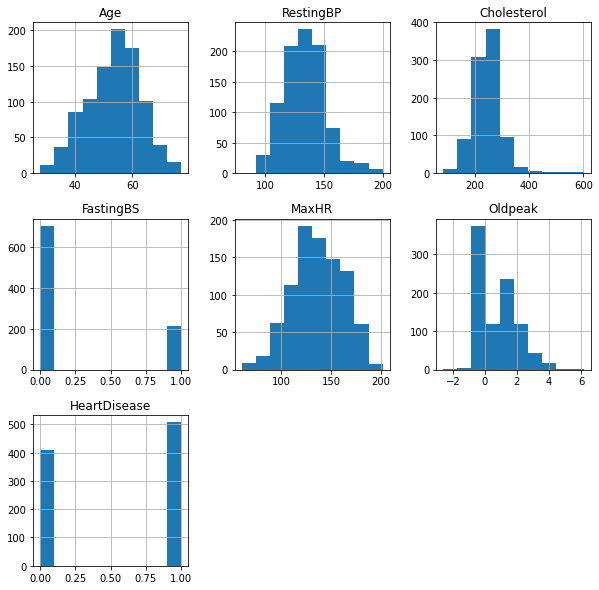

In [55]:
histClean = dfHeart.hist(figsize = (10,10))

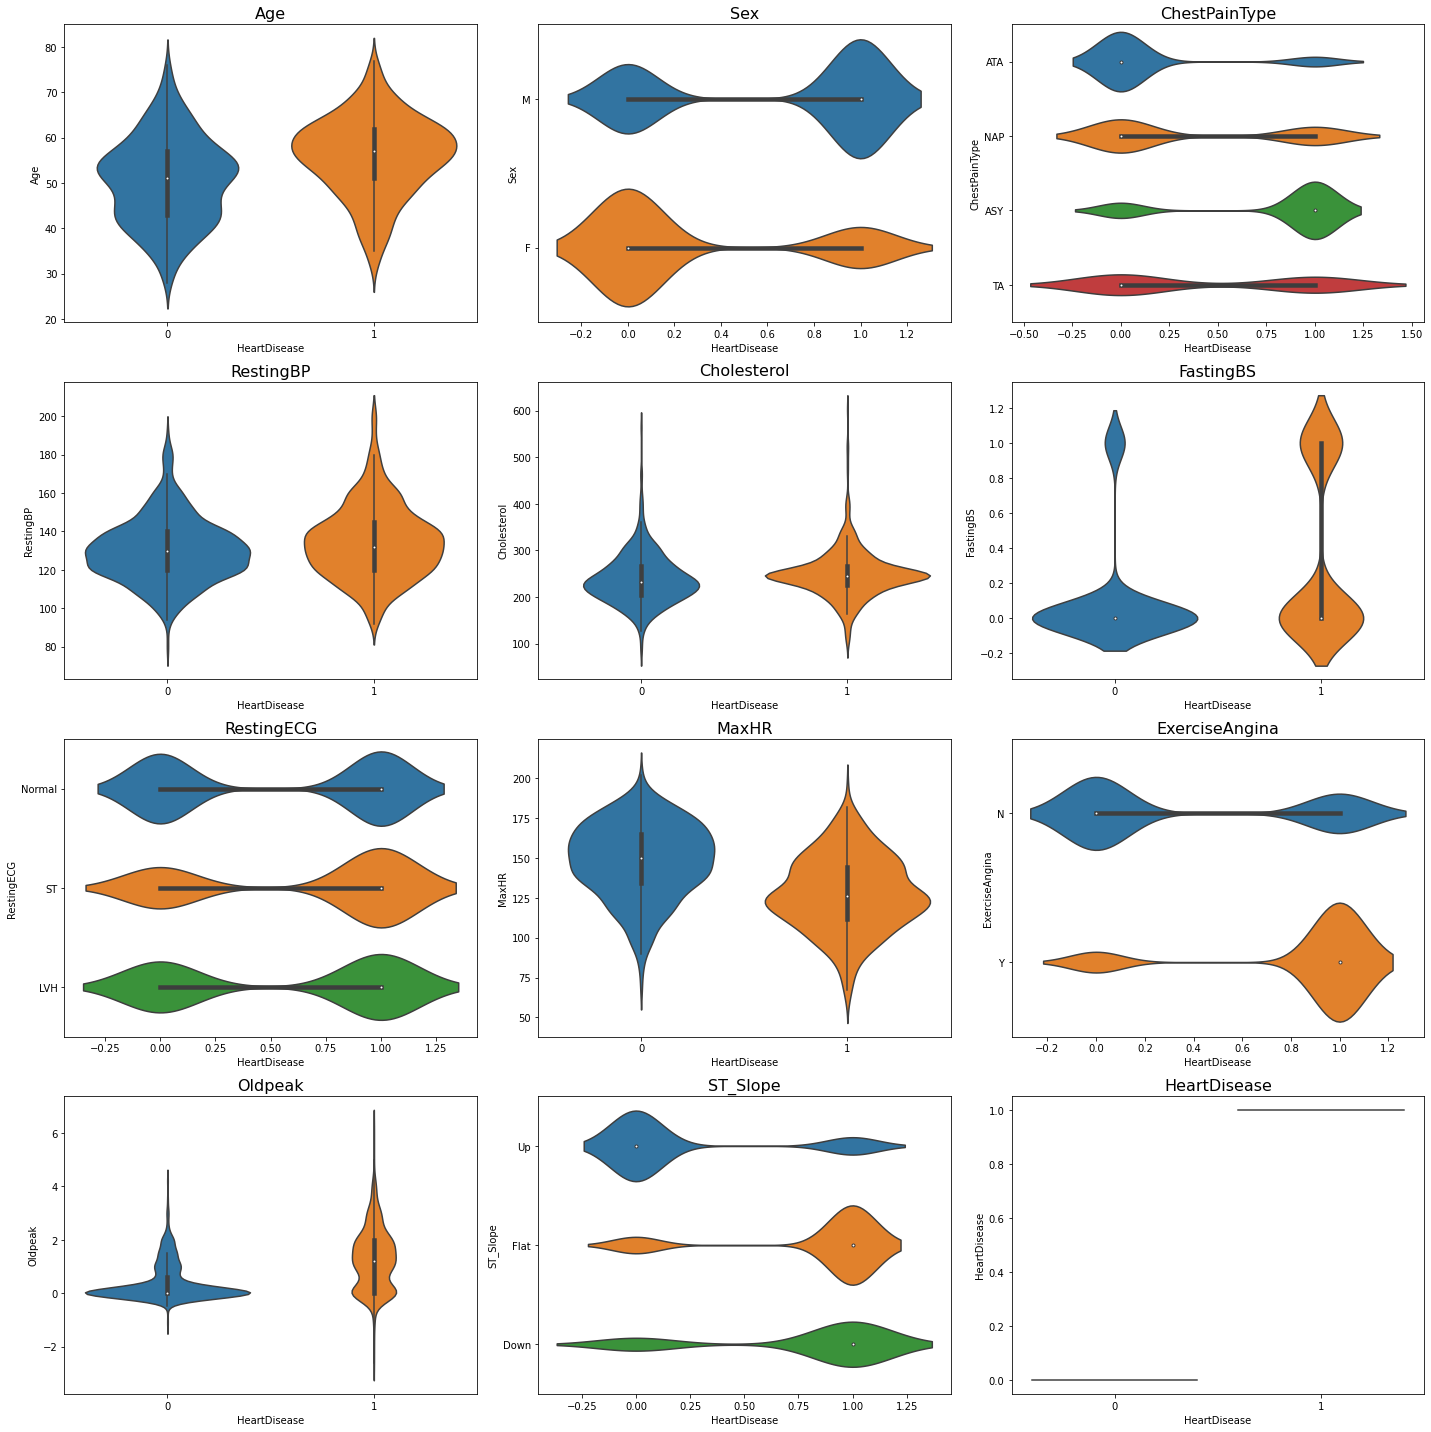

In [56]:
# Define the number of rows and columns for the subplots
nrows, ncols = 4, 3

# Create a figure and axes for the subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))

# Flatten the axes array
axes = axes.flatten()

# Loop over the columns of the DataFrame and plot each column in a separate subfigure
for i, col in enumerate(dfHeart.columns):
    sns.violinplot(x="HeartDisease", y =col, data=dfHeart, ax=axes[i])
    
# Set the title of each subfigure to the name of the corresponding column
for ax, col in zip(axes, dfHeart.columns):
    ax.set_title(col, fontsize=16)

# Show the plot
plt.tight_layout()
plt.show()

In [57]:
from sklearn.preprocessing import MinMaxScaler

# getting a list of numerical column names
num_cols = list(dfHeart.select_dtypes(include=['float64', 'int64']).columns)

# creating a scaler and fit it to the numerical data
scaler = MinMaxScaler()
dfHeart[num_cols] = scaler.fit_transform(dfHeart[num_cols])

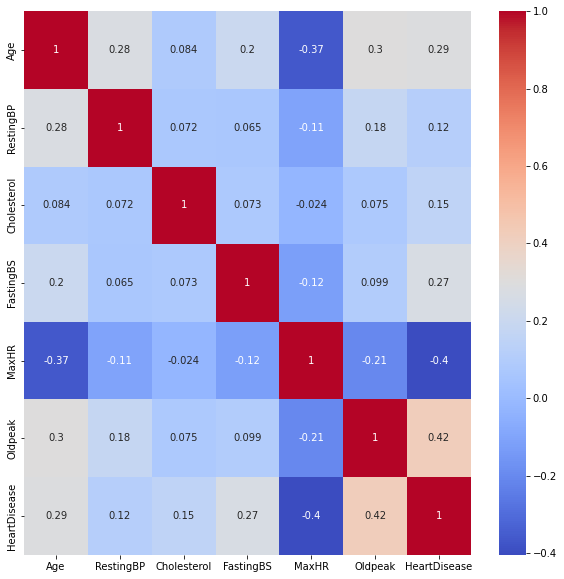

In [58]:
# Calculating correlation
corr_df = dfHeart.corr(method ='spearman')
# Creating heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

# Showing heatmap
plt.show()

Saving in a CSV.

In [59]:
dfHeart.to_csv(".\datasets\heart_ConditionalMeanImputation.csv",index=False)